# File and libraries

In [1]:
import pandas as pd
import numpy as np


filepath=r'data/df_merch_7_bal_input'
test_filepath= f"{filepath}_test.csv"
train_filepath= f"{filepath}_train.csv"

sample_filepath=f"{filepath}_sample.csv"
test_sample_filepath=f"{filepath}_test_sample.csv"
train_sample_filepath=f"{filepath}_train_sample.csv"

file_tag = "Google Merch Shop"

# DSLabs functions

In [2]:
%run "scripts/dslabs_functions.py"


# Data functions

In [3]:
%run "scripts/data_functions.py"


data_functions lodaded


# Load

In [4]:

# test_data=True
test_data=False

# use to evaluate strategies. otherwise False to just transform data 
evaluate=True
# evaluate=False

if test_data==True:

    data=pd.read_csv(f"{filepath}.csv")
    
    test= pd.read_csv(test_filepath)
    train= pd.read_csv(train_filepath)

    # sample to test setup
    sample=0.005
    data = data.groupby('day_of_year').apply(lambda x: sample_per_day(x, sample)).reset_index(drop=True)
    test = test.groupby('day_of_year').apply(lambda x: sample_per_day(x, sample)).reset_index(drop=True)
    train = train.groupby('day_of_year').apply(lambda x: sample_per_day(x, sample)).reset_index(drop=True)

    
else:
    # data=pd.read_csv(f"{filepath}.csv")  
    # test= pd.read_csv(test_filepath)
    # train= pd.read_csv(train_filepath)

    # use 10% sample file when heavy processing
    data=pd.read_csv(sample_filepath)
    test= pd.read_csv(test_sample_filepath)
    train= pd.read_csv(train_sample_filepath)
 
 
target='returning_user'
target_metric='f2'
vars: list[str] = data.columns.to_list()
labels: list = list(data[target].unique())


# ensure sorting by day_of_year for correct splitting 
# "When in the presence of temporal data, data partition shall use older data to train and newer to test, in order to not use future data to classify past data. In any other case, partition shall be random."
data.sort_values(by='day_of_year', inplace=True)
test.sort_values(by='day_of_year', inplace=True)
train.sort_values(by='day_of_year', inplace=True)



data.info()

FileNotFoundError: [Errno 2] No such file or directory: 'data/df_merch_7_bal_input_sample.csv'

# Distribution Check

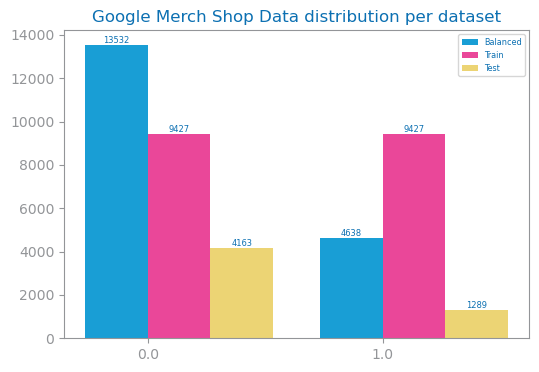

In [5]:
from pandas import concat
from matplotlib.pyplot import figure, show
from dslabs_functions import plot_multibar_chart


# Distribution check


# Create a dictionary to store original class counts
values: dict[str, list[int]] = {
    "Balanced": [
        len(data[data[target] == 0]),  # Assuming 0 is the negative class
        len(data[data[target] == 1]),  # Assuming 1 is the positive class
    ]
}

values["Train"] = [
    len(train[train[target] == 0]),
    len(train[train[target] == 1]),
]
values["Test"] = [
    len(test[test[target] == 0]),
    len(test[test[target] == 1]),
]

# Visualize the distribution
figure(figsize=(6, 4))
plot_multibar_chart(labels, values, title=f"{file_tag} Data distribution per dataset")
show()

# eval prep

In [6]:
trnX, tstX, trnY, tstY, labels, vars = read_train_test_from_files(train, test, target)
print(f'Train#={len(trnX)} Test#={len(tstX)}')
print(f'Labels={labels}')

Train#=18854 Test#=5452
Labels=[0.0, 1.0]


In [7]:
max_iter_eval=1250
lag_eval=250

# f2 evaluate

## f2 study

MLP lr_type=constant lr=0.5 n=250
MLP lr_type=constant lr=0.5 n=500
MLP lr_type=constant lr=0.5 n=750
MLP lr_type=constant lr=0.5 n=1000
MLP lr_type=constant lr=0.5 n=1250
MLP lr_type=constant lr=0.05 n=250
MLP lr_type=constant lr=0.05 n=500
MLP lr_type=constant lr=0.05 n=750
MLP lr_type=constant lr=0.05 n=1000
MLP lr_type=constant lr=0.05 n=1250
MLP lr_type=constant lr=0.0005 n=250
MLP lr_type=constant lr=0.0005 n=500
MLP lr_type=constant lr=0.0005 n=750
MLP lr_type=constant lr=0.0005 n=1000
MLP lr_type=constant lr=0.0005 n=1250
MLP lr_type=invscaling lr=0.5 n=250
MLP lr_type=invscaling lr=0.5 n=500
MLP lr_type=invscaling lr=0.5 n=750
MLP lr_type=invscaling lr=0.5 n=1000
MLP lr_type=invscaling lr=0.5 n=1250
MLP lr_type=invscaling lr=0.05 n=250
MLP lr_type=invscaling lr=0.05 n=500
MLP lr_type=invscaling lr=0.05 n=750
MLP lr_type=invscaling lr=0.05 n=1000
MLP lr_type=invscaling lr=0.05 n=1250
MLP lr_type=invscaling lr=0.0005 n=250
MLP lr_type=invscaling lr=0.0005 n=500
MLP lr_type=invsc

<Figure size 640x480 with 0 Axes>

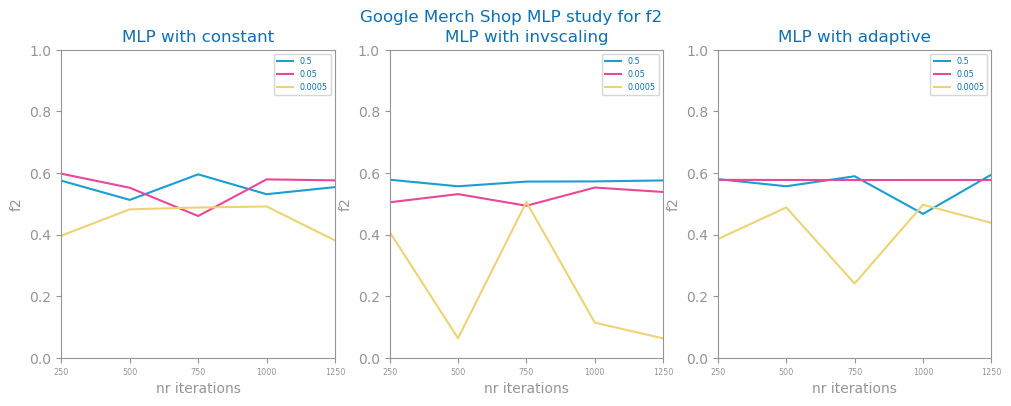

In [8]:

figure()

best_model_f2, f2_params = mlp_study(
    trnX,
    trnY,
    tstX,
    tstY,
    nr_max_iterations=max_iter_eval,
    lag=lag_eval,
    metric='f2',
    learning_rates= [0.5, 0.05, 0.0005],
    
    file_tag=file_tag
)
savefig(f"images/{file_tag}_mlp_{f2_params['metric']}_study.png")
show()

MLP lr_type=constant lr=0.8 n=50
MLP lr_type=constant lr=0.8 n=100
MLP lr_type=constant lr=0.8 n=150
MLP lr_type=constant lr=0.8 n=200
MLP lr_type=constant lr=0.8 n=250
MLP lr_type=constant lr=0.8 n=300
MLP lr_type=constant lr=0.8 n=350
MLP lr_type=constant lr=0.8 n=400
MLP lr_type=constant lr=0.8 n=450
MLP lr_type=constant lr=0.8 n=500
MLP lr_type=constant lr=0.1 n=50
MLP lr_type=constant lr=0.1 n=100
MLP lr_type=constant lr=0.1 n=150
MLP lr_type=constant lr=0.1 n=200
MLP lr_type=constant lr=0.1 n=250
MLP lr_type=constant lr=0.1 n=300
MLP lr_type=constant lr=0.1 n=350
MLP lr_type=constant lr=0.1 n=400
MLP lr_type=constant lr=0.1 n=450
MLP lr_type=constant lr=0.1 n=500
MLP lr_type=constant lr=0.01 n=50
MLP lr_type=constant lr=0.01 n=100
MLP lr_type=constant lr=0.01 n=150
MLP lr_type=constant lr=0.01 n=200
MLP lr_type=constant lr=0.01 n=250
MLP lr_type=constant lr=0.01 n=300
MLP lr_type=constant lr=0.01 n=350
MLP lr_type=constant lr=0.01 n=400
MLP lr_type=constant lr=0.01 n=450
MLP lr_t

<Figure size 640x480 with 0 Axes>

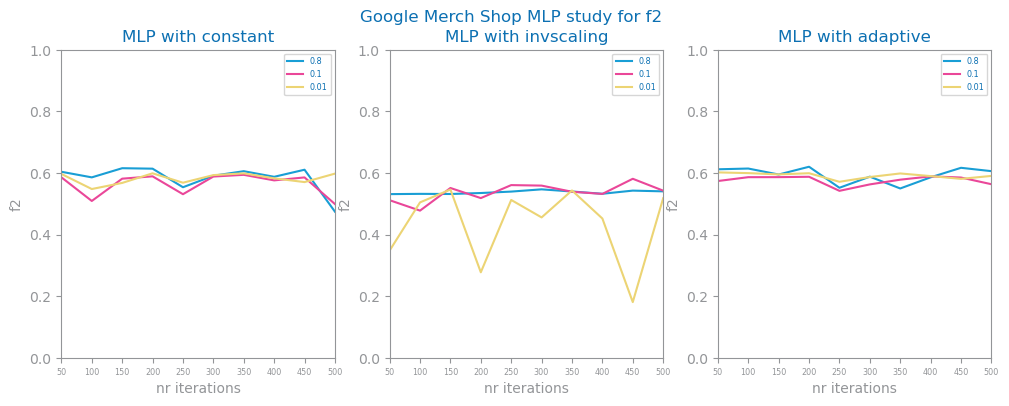

In [12]:
figure()

best_model_f2_alt, f2_params_alt = mlp_study(
    trnX,
    trnY,
    tstX,
    tstY,
    nr_max_iterations=500,
    lag=50,
    metric='f2',
    learning_rates= [0.8, 0.1,0.01],
    
    file_tag=file_tag
)
# savefig(f"images/{file_tag}_mlp_{f2_params['metric']}_study.png")
show()

## f2 best model

<Figure size 640x480 with 0 Axes>

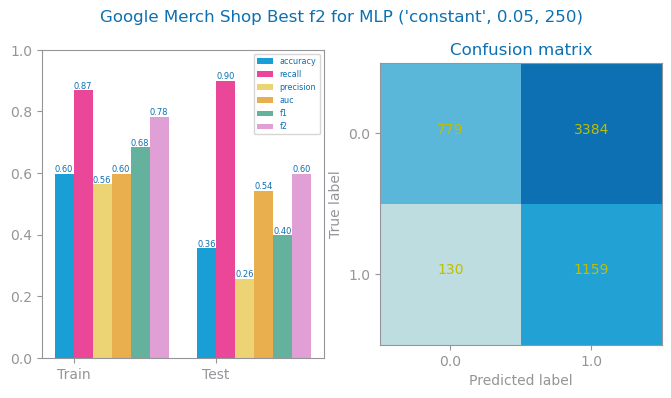

In [11]:
prd_trn: array = best_model_f2.predict(trnX)
prd_tst: array = best_model_f2.predict(tstX)
figure()
plot_evaluation_results(f2_params, trnY, prd_trn, tstY, prd_tst, labels,file_tag=file_tag)
savefig(f'images/{file_tag}_mlp_{f2_params["name"]}_best_{f2_params["metric"]}_eval.png')
show()

## f2 Overfitting

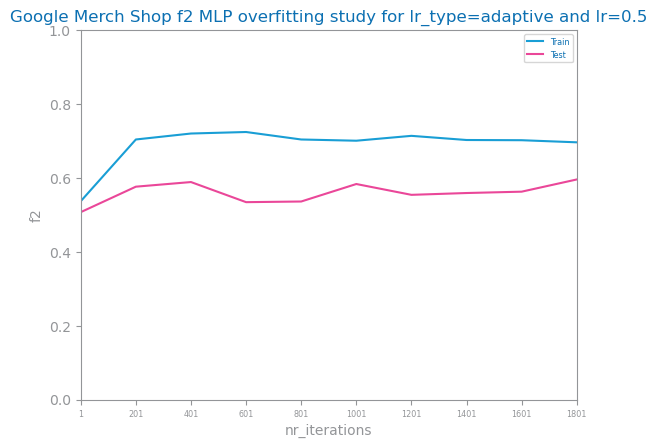

In [49]:
lr_type: Literal["constant", "invscaling", "adaptive"] = f2_params["params"][0]
lr: float = f2_params["params"][1]
nr_iterations: list[int] = [i for i in range(1, max_iter_eval, lag_eval)]

y_tst_values: list[float] = []
y_trn_values: list[float] = []
eval_metric = f2_params['metric']

warm_start: bool = False
for n in nr_iterations:
    clf = MLPClassifier(
        warm_start=warm_start,
        learning_rate=lr_type,
        learning_rate_init=lr,
        max_iter=n,
        activation="logistic",
        solver="sgd",
        verbose=False,
    )
    clf.fit(trnX, trnY)
    prd_tst_Y: array = clf.predict(tstX)
    prd_trn_Y: array = clf.predict(trnX)
    y_tst_values.append(CLASS_EVAL_METRICS[eval_metric](tstY, prd_tst_Y))
    y_trn_values.append(CLASS_EVAL_METRICS[eval_metric](trnY, prd_trn_Y))
    warm_start = True

figure()
plot_multiline_chart(
    nr_iterations,
    {"Train": y_trn_values, "Test": y_tst_values},
    title=f"{file_tag} {eval_metric} MLP overfitting study for lr_type={lr_type} and lr={lr}",
    xlabel="nr_iterations",
    ylabel=str(eval_metric),
    percentage=True,
)
savefig(f"images/{file_tag}_mlp_{eval_metric}_overfitting.png")

## f2 loss curve

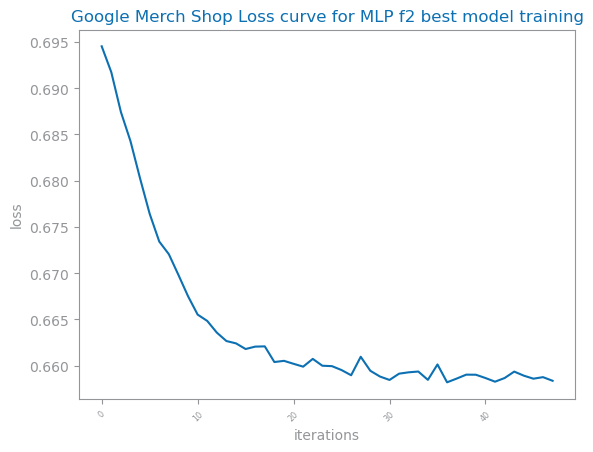

In [16]:
figure()
plot_line_chart(
    arange(len(best_model_f2.loss_curve_)),
    best_model_f2.loss_curve_,
    title=f"{file_tag} Loss curve for MLP {f2_params['metric']} best model training",
    xlabel="iterations",
    ylabel="loss",
    percentage=False,
)
savefig(f"images/{file_tag}_mlp_{f2_params['metric']}_loss_curve.png")
 

# precision evaluate

## precision study

MLP lr_type=constant lr=0.5 n=250
MLP lr_type=constant lr=0.5 n=500
MLP lr_type=constant lr=0.5 n=750
MLP lr_type=constant lr=0.5 n=1000
MLP lr_type=constant lr=0.5 n=1250
MLP lr_type=constant lr=0.05 n=250
MLP lr_type=constant lr=0.05 n=500
MLP lr_type=constant lr=0.05 n=750
MLP lr_type=constant lr=0.05 n=1000
MLP lr_type=constant lr=0.05 n=1250
MLP lr_type=constant lr=0.005 n=250
MLP lr_type=constant lr=0.005 n=500
MLP lr_type=constant lr=0.005 n=750
MLP lr_type=constant lr=0.005 n=1000
MLP lr_type=constant lr=0.005 n=1250
MLP lr_type=constant lr=0.0005 n=250
MLP lr_type=constant lr=0.0005 n=500
MLP lr_type=constant lr=0.0005 n=750
MLP lr_type=constant lr=0.0005 n=1000
MLP lr_type=constant lr=0.0005 n=1250
MLP lr_type=invscaling lr=0.5 n=250
MLP lr_type=invscaling lr=0.5 n=500
MLP lr_type=invscaling lr=0.5 n=750
MLP lr_type=invscaling lr=0.5 n=1000
MLP lr_type=invscaling lr=0.5 n=1250
MLP lr_type=invscaling lr=0.05 n=250
MLP lr_type=invscaling lr=0.05 n=500
MLP lr_type=invscaling lr=

<Figure size 640x480 with 0 Axes>

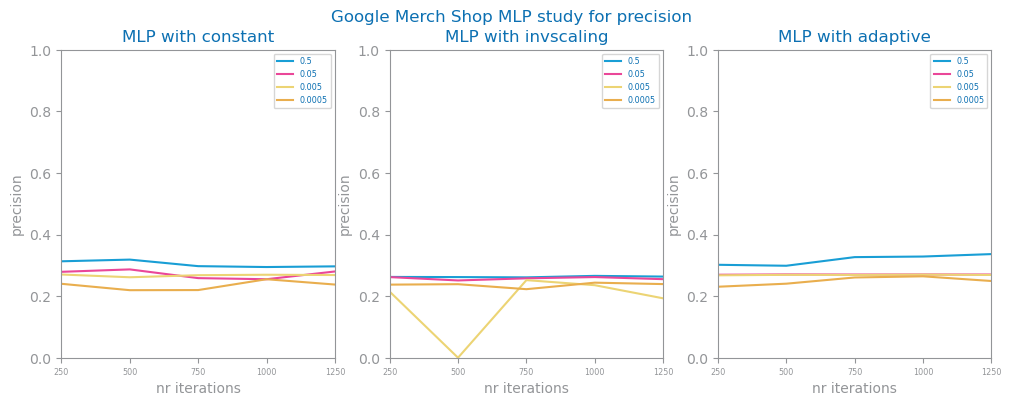

In [13]:

figure()

best_model_prec, prec_params = mlp_study(
    trnX,
    trnY,
    tstX,
    tstY,
    nr_max_iterations=max_iter_eval,
    lag=lag_eval,
    metric='precision',
    file_tag=file_tag
)
savefig(f"images/{file_tag}_mlp_{prec_params['metric']}_study.png")
show()

## precision best model

<Figure size 640x480 with 0 Axes>

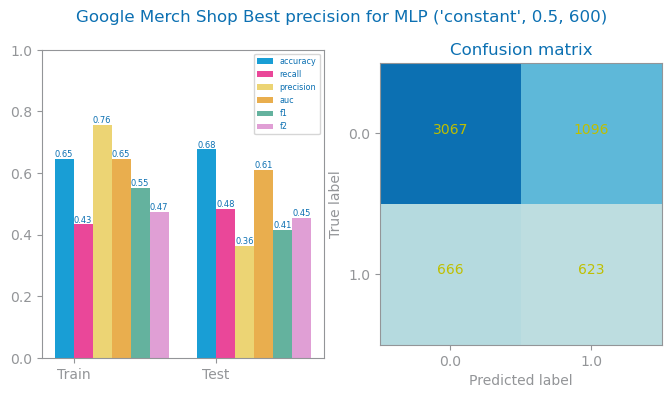

In [51]:
prd_trn: array = best_model_prec.predict(trnX)
prd_tst: array = best_model_prec.predict(tstX)
figure()
plot_evaluation_results(prec_params, trnY, prd_trn, tstY, prd_tst, labels, file_tag)
savefig(f'images/{file_tag}_mlp_{prec_params["name"]}_best_{prec_params["metric"]}_eval.png')
show()

## precision overfitting

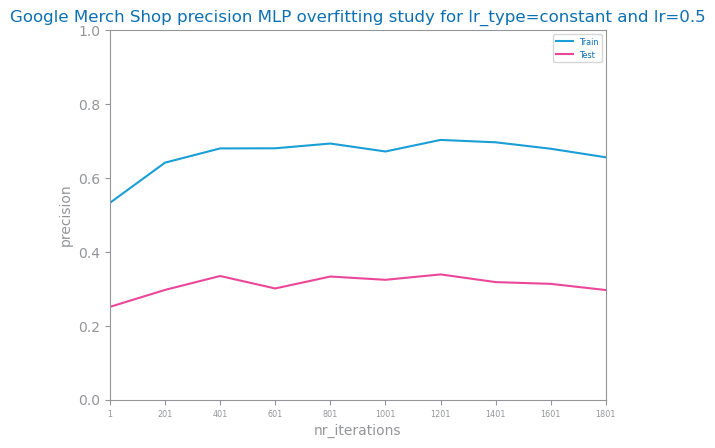

In [52]:
lr_type: Literal["constant", "invscaling", "adaptive"] = prec_params["params"][0]
lr: float = prec_params["params"][1]
nr_iterations: list[int] = [i for i in range(1, max_iter_eval, lag_eval)]

y_tst_values: list[float] = []
y_trn_values: list[float] = []
eval_metric = prec_params['metric']

warm_start: bool = False
for n in nr_iterations:
    clf = MLPClassifier(
        warm_start=warm_start,
        learning_rate=lr_type,
        learning_rate_init=lr,
        max_iter=n,
        activation="logistic",
        solver="sgd",
        verbose=False,
    )
    clf.fit(trnX, trnY)
    prd_tst_Y: array = clf.predict(tstX)
    prd_trn_Y: array = clf.predict(trnX)
    y_tst_values.append(CLASS_EVAL_METRICS[eval_metric](tstY, prd_tst_Y))
    y_trn_values.append(CLASS_EVAL_METRICS[eval_metric](trnY, prd_trn_Y))
    warm_start = True

figure()
plot_multiline_chart(
    nr_iterations,
    {"Train": y_trn_values, "Test": y_tst_values},
    title=f"{file_tag} {eval_metric} MLP overfitting study for lr_type={lr_type} and lr={lr}",
    xlabel="nr_iterations",
    ylabel=str(eval_metric),
    percentage=True,
)
savefig(f"images/{file_tag}_mlp_{eval_metric}_overfitting.png")

## precision loss curve

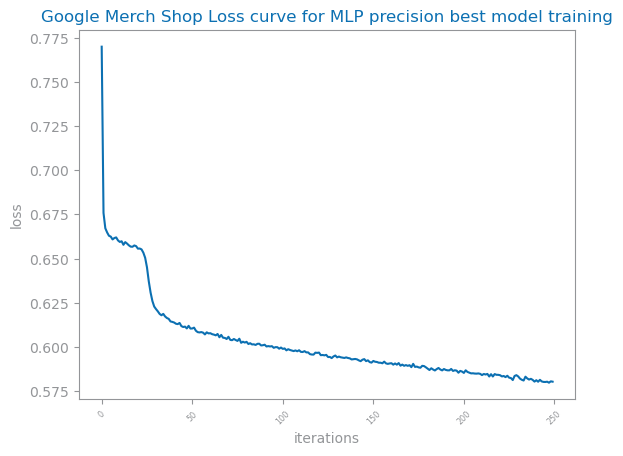

In [15]:
figure()
plot_line_chart(
    arange(len(best_model_prec.loss_curve_)),
    best_model_prec.loss_curve_,
    title=f"{file_tag} Loss curve for MLP {prec_params['metric']} best model training",
    xlabel="iterations",
    ylabel="loss",
    percentage=False,
)
savefig(f"images/{file_tag}_mlp_{prec_params['metric']}_loss_curve.png")

# Analysis

- Traffic source and medium with higher importance
- overfitting from level 3
